IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Tarea 01 – Cargando y Analizando Datos

- **Fecha de Entrega:** martes 26 de agosto de 2025, a las 23:59.
- 
**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en l emódulo de Tara 01 habilitado en Canvas.




## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, tendremos como objetivo comprender cómo han cambiado los juegos de mesa en los últimos 40 años. Específicamente queremos saber qué tipos de juegos se han vuelto más comunes hoy en día y qué los caracteriza.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

Estaremos utilizando información extraída desde [BoardGameGeek.com](https://boardgamegeek.com/), una plataforma para aficionados de los juegos de mesa, que permite a sus usuarios registrar, calificar e intercambiar sus juegos favoritos. Actualmente, BGG es una de las bases de datos más extensa y diversa de juegos de mesa.

El dataset con el que trabajaremos consiste en un grupo de archivos CSV que contienen información sobre más de 100.000 juegos de mesa almacenados en la plataforma. Este puede descargarse directamente desde el siguiente enlace: https://www.kaggle.com/datasets/mshepherd/board-games Para descargar los datos, haga click en el botón de **Download**, donde podrá descargar los archivos como `.zip`, o bien utilizar la API de Kaggle.

Para el desarrollo de esta tarea, solo utilizaremos los archivos con el prefijo `bgg_`.

**Si utiliza la API de Kaggle para descargar los datos, deje el código utilizado en la siguiente celda:**

In [6]:
# Descarga de datos desde Kaggle

### 2.1 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 DataFrame unificado (1 punto)

Vamos a cargar en un DataFrame los datos de juegos guardados en el documento `bgg_GameItem.csv`. Al inspeccionar nuestros datos, podemos notar que los valores de ciertas comunas vienen "codificados" con ID. Para comenzar, vamos a juntar la información de los distintos archivos descargados.

**a) (0.8 pts)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

In [2]:

dat = pd.read_csv('bgg_GameItem.csv', delimiter=',')
tipos_juego = pd.read_csv('bgg_GameType.csv')          
personas = pd.read_csv('bgg_Person.csv')        
mecanicas = pd.read_csv('bgg_Mechanic.csv')    
categorias = pd.read_csv('bgg_Category.csv')  
editorial = pd.read_csv('bgg_Publisher.csv') 
familia = pd.read_csv('bgg_GameFamily.csv')

id_to_name = dict(zip(personas['bgg_id'], personas['name']))
id_to_name_gametype = dict(zip(tipos_juego['bgg_id'], tipos_juego['name']))
id_to_name_publisher = dict(zip(editorial['bgg_id'], editorial['name']))
id_to_name_family = dict(zip(familia['bgg_id'], familia['name']))
id_to_name_category = dict(zip(categorias['bgg_id'], categorias['name']))
id_to_name_mechanic = dict(zip(mecanicas['bgg_id'], mecanicas['name']))

def convertir_ids_a_nombres(ids_string, mapping_dict):
    if pd.isna(ids_string) or ids_string == '':
        return ''
    ids_string = str(ids_string)
    ids = ids_string.split(',')
    nombres = []
    for id_str in ids:
        try:
            id_num = int(id_str.strip())
            if id_num in mapping_dict:
                nombres.append(mapping_dict[id_num])
            else:
                nombres.append(f"ID_{id_num}") 
        except ValueError:
            nombres.append(id_str.strip())
    return ', '.join(nombres)

dat['artist_names'] = dat['artist'].apply(lambda x: convertir_ids_a_nombres(x, id_to_name))
dat['designer_names'] = dat['designer'].apply(lambda x: convertir_ids_a_nombres(x, id_to_name))
dat['game_type_names'] = dat['game_type'].apply(lambda x: convertir_ids_a_nombres(x, id_to_name_gametype))
dat['publisher_names'] = dat['publisher'].apply(lambda x: convertir_ids_a_nombres(x, id_to_name_publisher))
dat['familia_names'] = dat['family'].apply(lambda x: convertir_ids_a_nombres(x, id_to_name_family))
dat['categoria_names'] = dat['category'].apply(lambda x: convertir_ids_a_nombres(x, id_to_name_category))
dat['mecanica_names'] = dat['mechanic'].apply(lambda x: convertir_ids_a_nombres(x, id_to_name_mechanic))

dat['artist'] = dat['artist_names']
dat['designer'] = dat['designer_names']
dat['game_type'] = dat['game_type_names']
dat['publisher'] = dat['publisher_names']
dat['familia'] = dat['familia_names']
dat['mechanic'] = dat['mecanica_names']
dat['category'] = dat['categoria_names']

dat = dat.drop(['artist_names', 'designer_names', 'game_type_names', 'publisher_names','familia_names','categoria_names', 'mecanica_names'], axis=1)

dat = dat.rename(columns={"name":"Nombre Juego","year":"Año","game_type":"Tipo","publisher":"Editorial", "artist": "Artista","designer": "Diseñador",'category':'Categoria', 'mechanic':'Mecanica'})
dat.to_csv('DataFrame.csv', index=False, encoding='utf-8')
dat.head()
# se utilizo IA para generar la funcion convertir_ids_a_nombres, se le pidio que convirtiera una cadena de IDs separados por coma a nombres.

,bgg_id,Nombre Juego,Año,Tipo,Diseñador,Artista,Editorial,min_players,max_players,min_players_rec,...,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id,familia
0,1,Die Macher,1986.0,Strategy Game,Karl-Heinz Schmiel,"Marcus Gschwendtner, Harald Lieske","Hans im Glück, Moskito Spiele, Ediciones MasQu...",3.0,5.0,4.0,...,7.06367,4.3144,1.166667,NaN,NaN,NaN,NaN,NaN,NaN,"Country: Germany, Political: Elections, Series..."
1,2,Dragonmaster,1981.0,Strategy Game,"G. W. ""Jerry"" D'Arcey",Bob Pepper,"E.S. Lowe, Milton Bradley",3.0,4.0,3.0,...,5.76599,1.9636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Components: Gems/Crystals, Creatures: Dragons,..."
2,3,Samurai,1998.0,Strategy Game,Reiner Knizia,Franz Vohwinkel,"Fantasy Flight Games, Hans im Glück, 999 Games...",2.0,4.0,2.0,...,7.22869,2.4784,1.006579,NaN,NaN,NaN,NaN,NaN,NaN,Components: Map (Continental / National scale)...
3,4,Tal der Könige,1992.0,Strategy Game,Christian Beierer,Thomas di Paolo,KOSMOS,2.0,4.0,2.0,...,5.66660,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Containers: Triangular Boxes, Country: Egypt, ..."
4,5,Acquire,1964.0,Strategy Game,Sid Sackson,"Scott Okumura, Peter Whitley","3M, The Avalon Hill Game Co, Avalon Hill, Duja...",2.0,6.0,3.0,...,7.12541,2.4985,1.095890,NaN,NaN,NaN,NaN,NaN,NaN,"Components: 9 x 12 Grids, Series: 3M Bookshelf..."


**b) (0.2 pts)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.



El DataFrame ocupa 33.9 MB de disco mientras que los documentos separados suman en total 17.1 MB. Esta diferencia se debe porque en la creacion de dataframe se seleccionaron datos en especifico(por ejemplo:nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial ) para luego codificarlos dando un mayor peso al dataframe, ya que son mas descriptivos y por ende tienen mas numeros de caracteres que una id, por ejemplo si una id aparece 10 veces,  y al codificar la id que es un digito este pesa menos es decir, si id = '2' (1 caracter) y la id = '2'=> Carlos Valdovinos (18 caracteres), entonces en el caso del ejemplo el nombre codificado se repite 10 veces Carlos Vadovinos haciendo que el dataframe aumente de espacio.

### 3.2 Juegos publicados anualmente (1.5 puntos)


**a) (0.5 pts)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?


In [3]:
dat = dat[dat['Año'].notna()]  
dat = dat[dat['Año'] != 'nan'] 
dat['Año'] = pd.to_numeric(dat['Año'], errors='coerce') 
dat = dat[dat['Año'].notna()] 
dat['Año'] = dat['Año'].astype(int)
print(f"Año minimo de publicacion: {dat['Año'].min()}")
print(f"Año maximo de publicacion: {dat['Año'].max()}")
print(dat[dat['Año'] <= -3000][['Nombre Juego', 'Año']])
# Respuesta:El rango es de [ -3500 , 2026] que es equivalente a decir, 3500 a.C al 2026 d.C, lo cual
# tiene sentido dado que si buscamos informacion en la DataFrame del año minimo (3500 a.C), este nos
# dice que el nombre del juego es Senet que es un juego del antiguo egipto y este segun la literatura
# está atestiguado en jeroglíficos desde -3100, por lo que tiene sentido su año de publicacion se estime 
# en el 3500 a.C.Lo mismo aplica para los juegos de mesa Mehen, Marbles, Knucklebones, 20 Squares, entre otro.


Año minimo de publicacion: -3500
Año maximo de publicacion: 2026
       Nombre Juego   Año
2060          Senet -3500
3593          Mehen -3000
4815        Marbles -3000
10284  Knucklebones -3000
20170    20 Squares -3000


**b) (0.5 pts)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

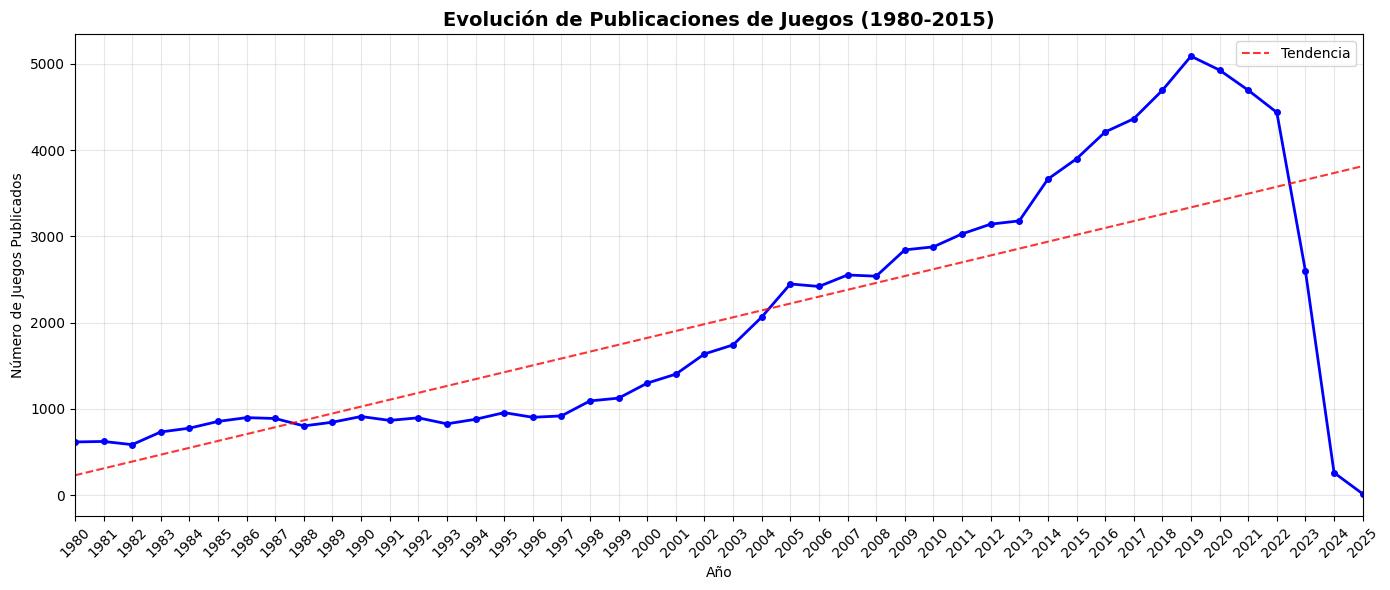

In [4]:
dat = pd.read_csv('DataFrame.csv')
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

plt.figure(figsize=(14, 6))

df_filtrado = dat[(dat['Año'] >= 1980) & (dat['Año'] <= 2025)]
juegos_por_año = df_filtrado['Año'].value_counts().sort_index()
    
plt.plot(juegos_por_año.index, juegos_por_año.values, marker='o', linewidth=2, markersize=4, color='blue')
    
plt.title(f'Evolución de Publicaciones de Juegos ({1980}-{2015})', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Número de Juegos Publicados')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
    
if len(juegos_por_año) > 1:
    z = np.polyfit(juegos_por_año.index, juegos_por_año.values, 1)
    p = np.poly1d(z)
    plt.plot(juegos_por_año.index, p(juegos_por_año.index), "--", alpha=0.8, color='red', label='Tendencia')
    plt.legend()
plt.xticks(range(1980, 2026, 1), rotation=45)
plt.xlim(1980, 2025)
plt.tight_layout()
plt.show()
# Respuesta:
# Segun el grafico la tendencia es creciente.Sin embargo, se puede observar una caida importante
# en el año 2019, de la cual se puede deducir que se debio al covid-19, dado que las personas desde 
# el comienzo y termino de la pandemia no pudieron realizar actividades sociales que les permitieran
# juegar o comprar juegos de mesa, por lo que probablemente repercutio a la publicacion de juegos de mesa.


#La creacion del grafico se elaboro con ayuda de IA, dado que algunas funciones de matplotlib y numpy no las podia entender,
#por lo le pedi que me ayudara a implementarlas.Los promps son los siguiente: 
# 1)"como puedo graficar mi dataframe con la variables que yo quiera?",
# 2)"plt.style.use('default') plt.rcParams['figure.figsize'] = (12, 6) plt.rcParams['font.size'] = 10 def grafico_lineal_basico(df): 
# plt.figure(figsize=(14, 6)) Contar juegos por año juegos_por_año = df['Año'].value_counts().sort_index() plt.plot(juegos_por_año.index, 
# juegos_por_año.values, marker='o', linewidth=2, markersize=4, color='blue') plt.title('Evolución de Publicaciones de Juegos por Año', 
# fontsize=14, fontweight='bold') plt.xlabel('Año') plt.ylabel('Número de Juegos Publicados') plt.grid(True, alpha=0.3) plt.xticks(rotation=45) 
# z = np.polyfit(juegos_por_año.index, juegos_por_año.values, 1) p = np.poly1d(z) plt.plot(juegos_por_año.index, p(juegos_por_año.index),
# "--", alpha=0.8, color='red', label='Tendencia') plt.legend() plt.tight_layout() plt.show() ahora si quiero que sea con un intervalo de tiempo, 
# por ejemplo desde al año 1800 al 2025, como se hace?"

**c) (0.5 pts)** ¿Entre qué años hubo un mayor aumento de publicación de juegos de mesa según los registros de BGG?

In [5]:
juegos_por_año = dat['Año'].value_counts().sort_index()
cambios = juegos_por_año.diff()
año_mayor = int(cambios.nlargest(1).index[0])
año_menor= int(año_mayor - 1)
print(f"Los años con mayor aumento de publicaciones fueron entre {año_menor} al {año_mayor}")
#Respuesta:
#Los años con mayor aumento de publicaciones fueron entre 2013 al 2014, ademans con la ayuda de diff de la libreria 
#pandas se puede determinar que entre los años 2013-2014 se produjo el mayor aumento de publicaciones por año,
#dado que el metodo diff se usa en una dataframe con el calculo de dos elementos consecutivos, este se aplico a juegos_por_año.



Los años con mayor aumento de publicaciones fueron entre 2013 al 2014


### 3.3 Análisis de duración y complejidad (1.5 puntos)

Si bien hay muchas posibles características que podemos explorar para los juegos de mesa, esta vez nos centraremos en el tiempo de juego y la complejidad. En esta sección queremos comprender si se ha modificado notablemente la duración promedio y la percepción de complejidad de los juegos de mesa a través de los años.

**a) (0.3 pts)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

In [6]:

datos = ['min_time', 'max_time', 'complexity']
for col in datos:
    dat = dat[dat[col].notna()]
    dat[col] = pd.to_numeric(dat[col], errors='coerce')
    dat = dat[dat[col].notna()]
    dat[col] = dat[col].astype(int)

rango_razonable = {
    'min_time': (1, 240),
    'max_time': (5, 480), 
    'complexity': (1, 5)
}

for col, (min_val, max_val) in rango_razonable.items():
    dat = dat[(dat[col] >= min_val) & (dat[col] <= max_val)]
#Respuesta:
#Se encontraron ouliers en min_time y max_time, por ejemplo en min_time se encontro max = 157.680 lo 
# cual equivale a 109 dias aprox. y en max_time se encontro max=  6.307200e+07 que equivale a 
# muchos años, por lo que se limpiaron estos datos y se escogio para min_time un maximo de 4 horas y en
# max_time un maximo de 8 horas, este rango es razonable ya que por consciencia historica, humana y social 
# se consigna "8 horas para trabajar, 8 para dormir y 8 para la casa", por lo que es mas sano jugar juegos 
# estableciendo este limite de tiempo. Tambien se redefinio por la calificacion de complejidad del juego por 
# mas facil = 1 y mas dificil = 5, porque popularmente se entiende mejor en esta escala. 


#Para crear el rango razonable se uso el siguiente prompt: como se incorpora un rango al limpiar o filtrar datos en mi codigo?

**b) (0.2 pts)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

In [7]:
print(dat.columns.tolist())
dat['avg_time'] = (dat['max_time'] + dat['min_time']) / 2
print(dat['avg_time'].describe())


['bgg_id', 'Nombre Juego', 'Año', 'Tipo', 'Diseñador', 'Artista', 'Editorial', 'min_players', 'max_players', 'min_players_rec', 'max_players_rec', 'min_players_best', 'max_players_best', 'min_age', 'min_age_rec', 'min_time', 'max_time', 'Categoria', 'Mecanica', 'cooperative', 'compilation', 'compilation_of', 'family', 'implementation', 'integration', 'rank', 'num_votes', 'avg_rating', 'stddev_rating', 'bayes_rating', 'complexity', 'language_dependency', 'bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id', 'wikipedia_id', 'familia']
count    42160.000000
mean        53.491734
std         49.176446
min          3.000000
25%         20.000000
50%         35.000000
75%         60.000000
max        360.000000
Name: avg_time, dtype: float64


**c) (0.5 pts)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

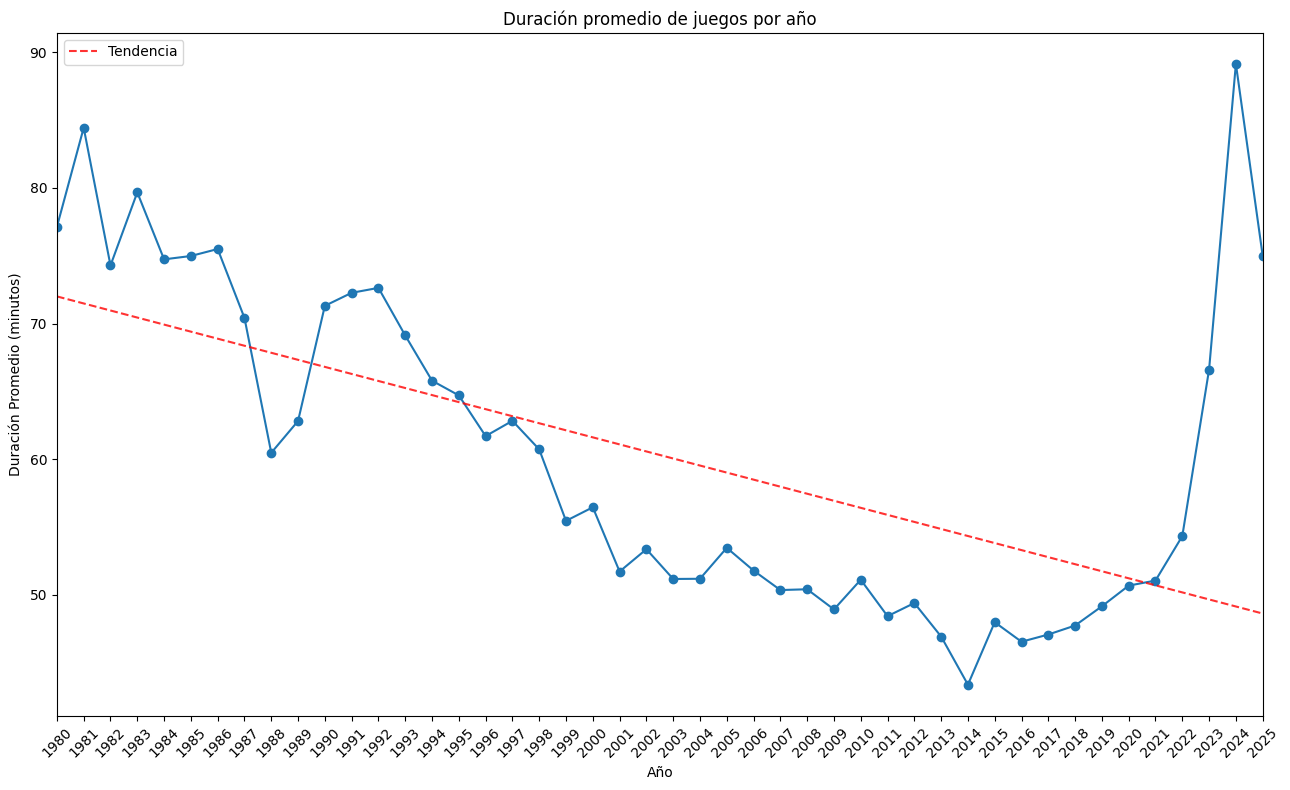

In [8]:
df_filtrado = dat[(dat['Año'] >= 1980) & (dat['Año'] <= 2025)]

promedio_por_año = df_filtrado.groupby('Año')['avg_time'].mean()

plt.figure(figsize=(13, 8))
plt.plot(promedio_por_año.index, promedio_por_año.values, marker='o')
plt.title('Duración promedio de juegos por año')
plt.xlabel('Año')
plt.ylabel('Duración Promedio (minutos)')

if len(promedio_por_año) > 1:
    z = np.polyfit(promedio_por_año.index, promedio_por_año.values, 1)
    p = np.poly1d(z)
    plt.plot(promedio_por_año.index, p(promedio_por_año.index), "--", alpha=0.8, color='red', label='Tendencia')
    plt.legend()
plt.xticks(range(1980, 2026, 1), rotation=45)
plt.xlim(1980, 2025)
plt.tight_layout()
plt.show()
#Respuesta : Existe un tendencia decreciente. Sin embargo el promedio por fue aumentando evidentemente a partir del 2021.

#Se aplico el mismo modelo de codigo del inciso 3.2.b, solo que con grupby y mean de la libreria pandas.

**d) (0.5 pts)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

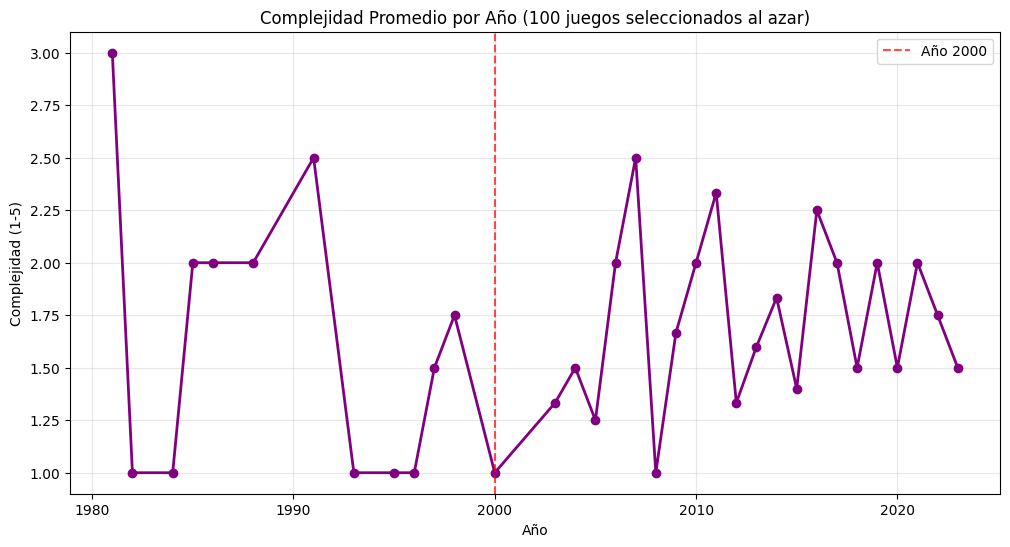

Los juegos recientes se perciben más complejos


In [9]:

filtrar_complejidad = dat[(dat['complexity'].notna()) &(dat['Año'] >= 1980) & (dat['Año'] <= 2025)]
seleccionados = filtrar_complejidad.sample(n=100, random_state=42)
complejidad_por_año = seleccionados.groupby('Año')['complexity'].mean()
plt.figure(figsize=(12, 6))
plt.plot(complejidad_por_año.index, complejidad_por_año.values, 
         marker='o', linewidth=2, markersize=6, color='purple')

plt.axvline(x=2000, color='red', linestyle='--', alpha=0.7, label='Año 2000')
plt.title('Complejidad Promedio por Año (100 juegos seleccionados al azar)')

plt.xlabel('Año')
plt.ylabel('Complejidad (1-5)')
plt.grid(True, alpha=0.3)
plt.legend()

antes_2000 = seleccionados[seleccionados['Año'] < 2000]['complexity'].mean()
despues_2000 = seleccionados[seleccionados['Año'] >= 2000]['complexity'].mean()
plt.show()
if despues_2000 > antes_2000:
    print("Los juegos recientes se perciben más complejos")
else:
    print("Los juegos recientes NO se perciben más complejos")

#Respuesta: La percepcion de los usuarios al parecer a sido de que los 
#juegos de despues de los 2000 son mas complejos. Despues del año 2000 se ve 
#un patron de crecimiento como en zig-zag vertical.


#Se creo parcialmente con ayuda de ia con el siguiente Prompt: como puedo aplicar mi codigo del grafico con 100 personas al azar entre 1980 y 2025?

### 3.4 Análisis de categorías comunes (2 puntos)

Existe una gran diversidad de categorías de juegos de mesa. Ahora nos concentraremos en un grupo específico de ellas, con el fin de analizar cómo a cambiado la cantidad de juegos de estas clases desde 1980 hasta hoy.

**a) (0.7 pts)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

Ranking 5 categorías:
Categoria
Card Game          12150
Wargame             6564
Children's Game     4562
Fantasy             4480
Dice                3954
Name: count, dtype: int64


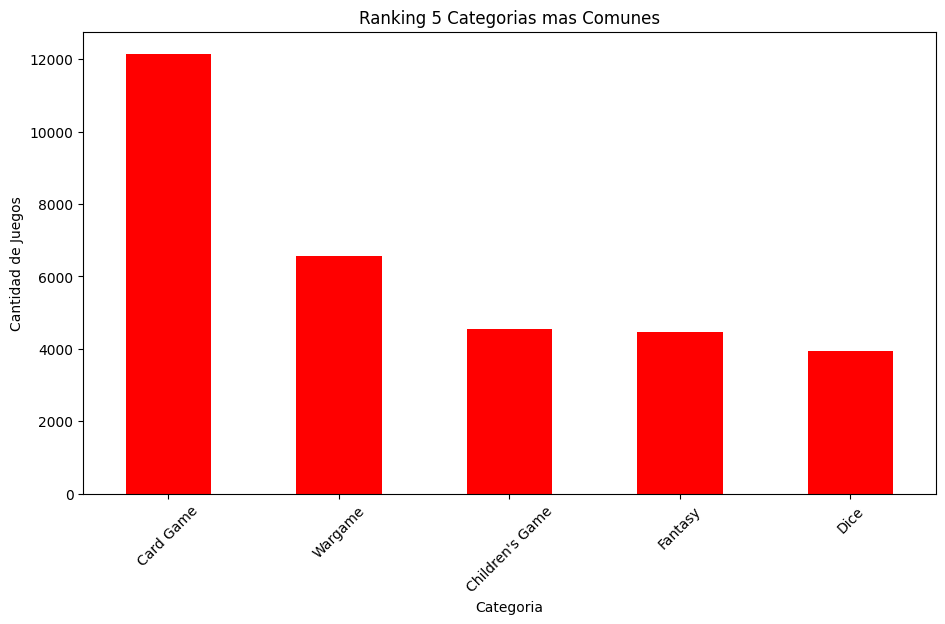

In [10]:
todas_cats = dat['Categoria'].dropna().str.split(',').explode().str.strip()

mas_comunes = todas_cats.value_counts().head(5)
print("Ranking 5 categorías:")
print(mas_comunes)

mas_comunes.plot(kind='bar', figsize=(11, 6), color='red')
plt.title('Ranking 5 Categorias mas Comunes')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

#Se creo con ayuda de IA prompt: como uso explode() y dropna() en pandas para separar valores por comas en filas ?"

Las cantidades mas comunes de categorias de juegos de mesa son: card game, wargame, children's game, fantasy y dice.

**b) (0.3 pts)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

In [11]:
categorias = mas_comunes.index.tolist()
dataframes_categorias = []
for categoria in categorias:
    juegos_categoria = dat[dat['Categoria'].str.contains(categoria, na=False, regex=False)]
    
    conteo_por_año = juegos_categoria.groupby('Año').size().reset_index()
    conteo_por_año.columns = ['Año', 'Cantidad']
    conteo_por_año['Categoria'] = categoria
    conteo_por_año = conteo_por_año[['Año', 'Categoria', 'Cantidad']]
    dataframes_categorias.append(conteo_por_año)
df_final = pd.concat(dataframes_categorias, ignore_index=True)
df_final.head(15)
#Se uso parcialemte IA prompt: como puedo unir mi datasframes?

,Año,Categoria,Cantidad
0,1425.0,Card Game,2
1,1500.0,Card Game,1
2,1534.0,Card Game,1
3,1550.0,Card Game,1
4,1579.0,Card Game,1
5,1589.0,Card Game,1
6,1600.0,Card Game,5
7,1611.0,Card Game,1
8,1630.0,Card Game,1
9,1660.0,Card Game,1


**c) (1 pto)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?


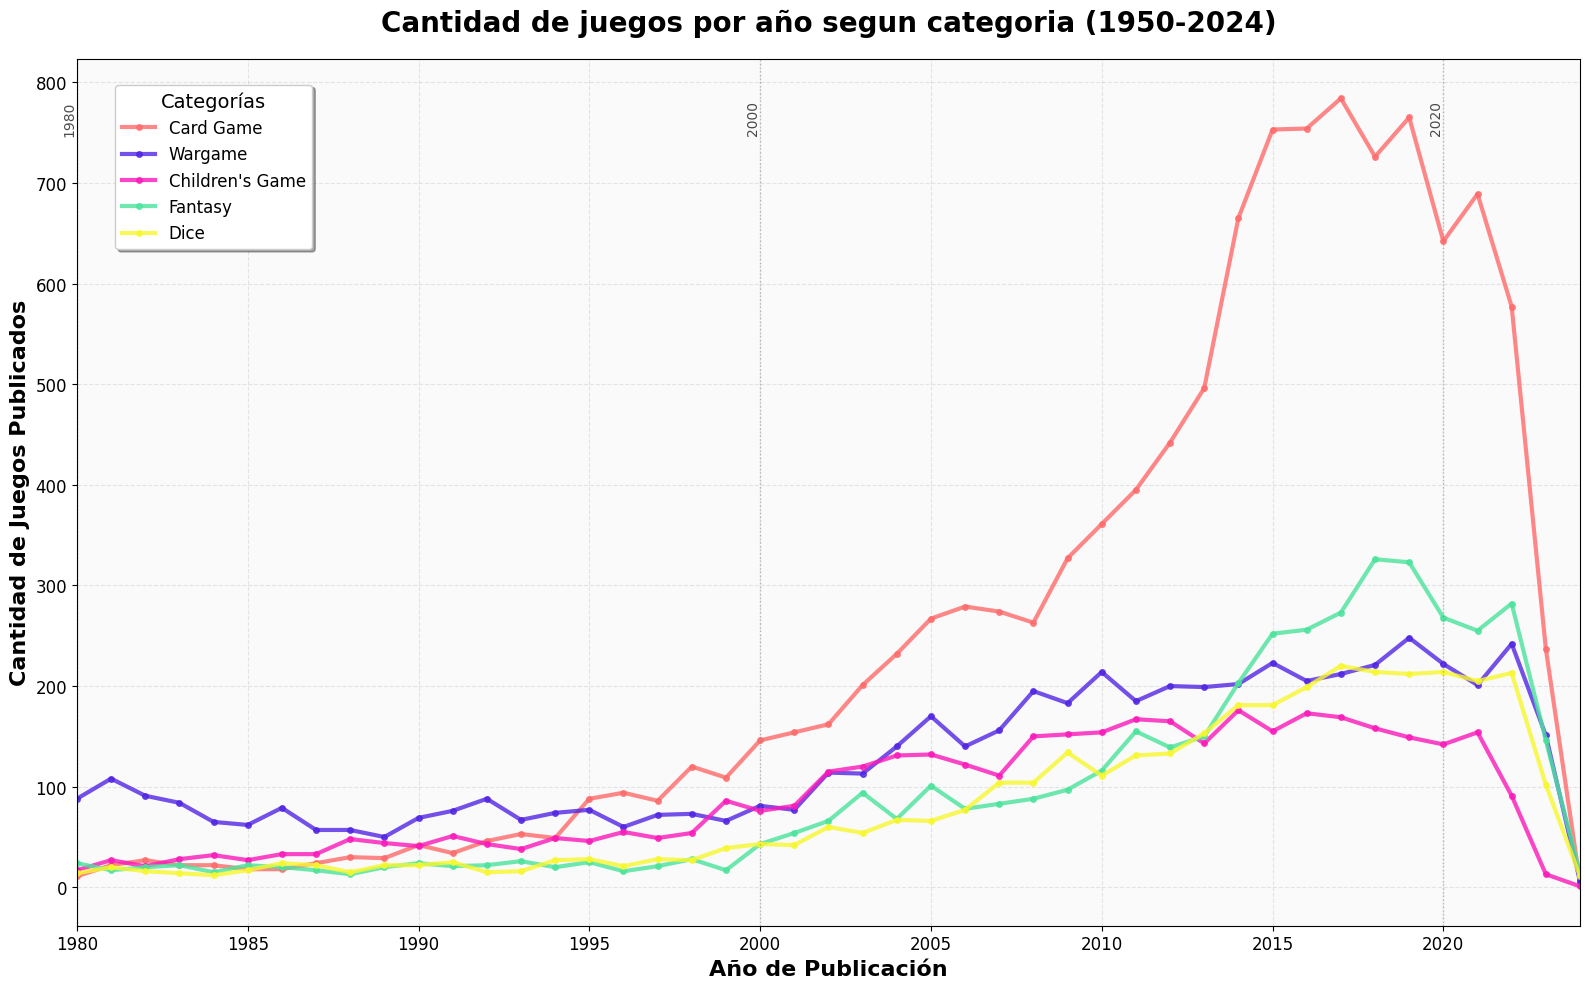

In [12]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(16, 10))
colores = ['#FF6B6B', "#5125E3", "#FA19BA", "#4BE39C", "#F7F72E"]
categorias_top5 = df_final['Categoria'].unique()
for i, categoria in enumerate(categorias_top5):
    datos_categoria = df_final[df_final['Categoria'] == categoria].sort_values('Año')
    
    ax.plot(datos_categoria['Año'], datos_categoria['Cantidad'], 
            color=colores[i], 
            linewidth=3, 
            marker='o', 
            markersize=4,
            label=categoria,
            alpha=0.8)


ax.set_title('Cantidad de juegos por año segun categoria (1950-2024)', 
             fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Año de Publicación', fontsize=16, fontweight='bold')
ax.set_ylabel('Cantidad de Juegos Publicados', fontsize=16, fontweight='bold')
ax.legend(title='Categorías', 
          title_fontsize=14, 
          fontsize=12, 
          loc='upper left', 
          frameon=True, 
          fancybox=True, 
          shadow=True,
          bbox_to_anchor=(0.02, 0.98))

ax.grid(True, alpha=0.3, linestyle='--')
ax.set_facecolor('#FAFAFA')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(1980, 2024)
for year in [1980, 2000, 2020]:
    ax.axvline(x=year, color='gray', linestyle=':', alpha=0.5, linewidth=1)
    ax.text(year, ax.get_ylim()[1] * 0.95, str(year), 
            rotation=90, verticalalignment='top', 
            horizontalalignment='right', fontsize=10, alpha=0.7)

plt.tight_layout()
plt.show()

#Respuesta:
#En efecto existe un cambio de los juegos mas comunes en los anos 80s y en la actualidad, dado que actualmente se prefieren o son mas populares
#los juegos de cartas, mientras que en los 80s los juegos de mesas mas populares eran los de guerra.

#Se uso parcialmente IA para crea el grafico, promtp: como puedo crear etiquetas de colores segun mi codigo?

### 3.5 Análisis Crítico (Bono +0.5 puntos)

¿Qué limitaciones o problemas encontraste en los datos?

In [13]:
#Una limitacion fue el codificar los ids dado que se presentaban algunos en formato de este estilo "111,222", por lo que se me hizo dificil en un
#en un inicio correlacionarlos con nombres, por ejemplo tuve que analizar y suponer que en el  archivo  bgg-Person estaban mezclados los nombres
#de artistas y diseñardores,ya que el framedata inicial de GameItem tenia ids para cada artista y diseñador pero por separado.Otra limitacion
#quizas fue que aun no domino las librerias y me cuesta hacer los graficos.